# Analysing Survival on the Titanic

## EDA on Titanic Dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Loading the data

In [2]:
titanic_df = pd.read_csv('../Data/Titanic-Dataset.csv')
# !git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

## Initial Inspection

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.shape

(891, 12)

In [7]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Descriptive Statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

## Data Cleaning

- Handle missing values
    - **Numerical Data:** For skewed distributions (like `Age` and `Fare`), using the **median** is more robust than the mean because it is not affected by outliers.
    - **Categorical Data:** A common strategy is to fill with the **mode** (the most frequent value).
    - **High Cardinality/Too Many Missing Values:** For columns like `Cabin`, where most data is missing, imputing might not be effective. We could either drop the column or engineer a new feature from it (e.g., `Has_Cabin`).

In [10]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

<Axes: ylabel='Frequency'>

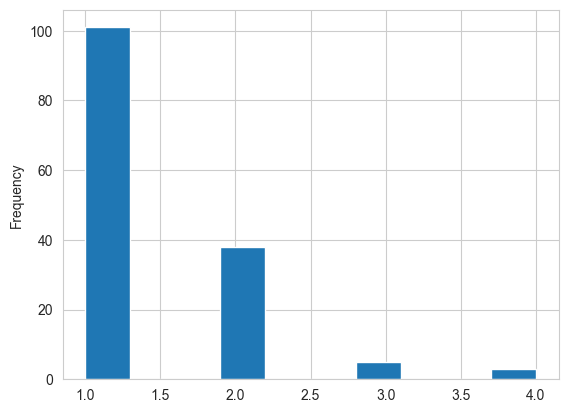

In [14]:
titanic_df['Cabin'].value_counts().plot(kind='hist')

if we fill age with mean/mode, then it will shift the value 
hence use median, it will not affect the value 

In [15]:
median = titanic_df['Age'].median()
print(median)

28.0


1. Handle missing 'Age' values

In [16]:
# Using the median to fill missing ages because the age distribution can be skewed.
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

In [17]:
# Verify the data after cleaning
print("Missing values after Age cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


2. Handle missing 'Embarked' values

In [18]:
mode = titanic_df['Embarked'].mode()[0]
print(mode)

S


In [19]:
# There are only two missing values, filling them with the most common port of embarkation (the mode).
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

In [20]:
# Verify the data after cleaning 
print("Missing values after Embarked cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


3. Handle the 'Cabin' column

In [21]:
# # With over 77% missing data, imputing is not a good idea. Instead, we'll create a new feature 'Has_Cabin'.
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not
titanic_df.drop('Cabin', axis=1, inplace=True) # Drop the original column

In [23]:
titanic_df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [28]:
# Verify that there are no more missing values
print("Missing values after cleaning:")
titanic_df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

## Univariate Analysis

Analyse each variable individually to understand its distribution. This is the simplest form of data analysis, where the data being analyzed contains only one variable.
- **For Categorical Variables:** We use frequency tables, bar charts (`countplot`), or pie charts to see the count or proportion of each category.
- **For Numerical Variables:** We use histograms (`histplot`) or kernel density plots (`kdeplot`) to understand the distribution, and box plots (`boxplot`) to identify the central tendency, spread, and outliers.

Analyzing categorical features:


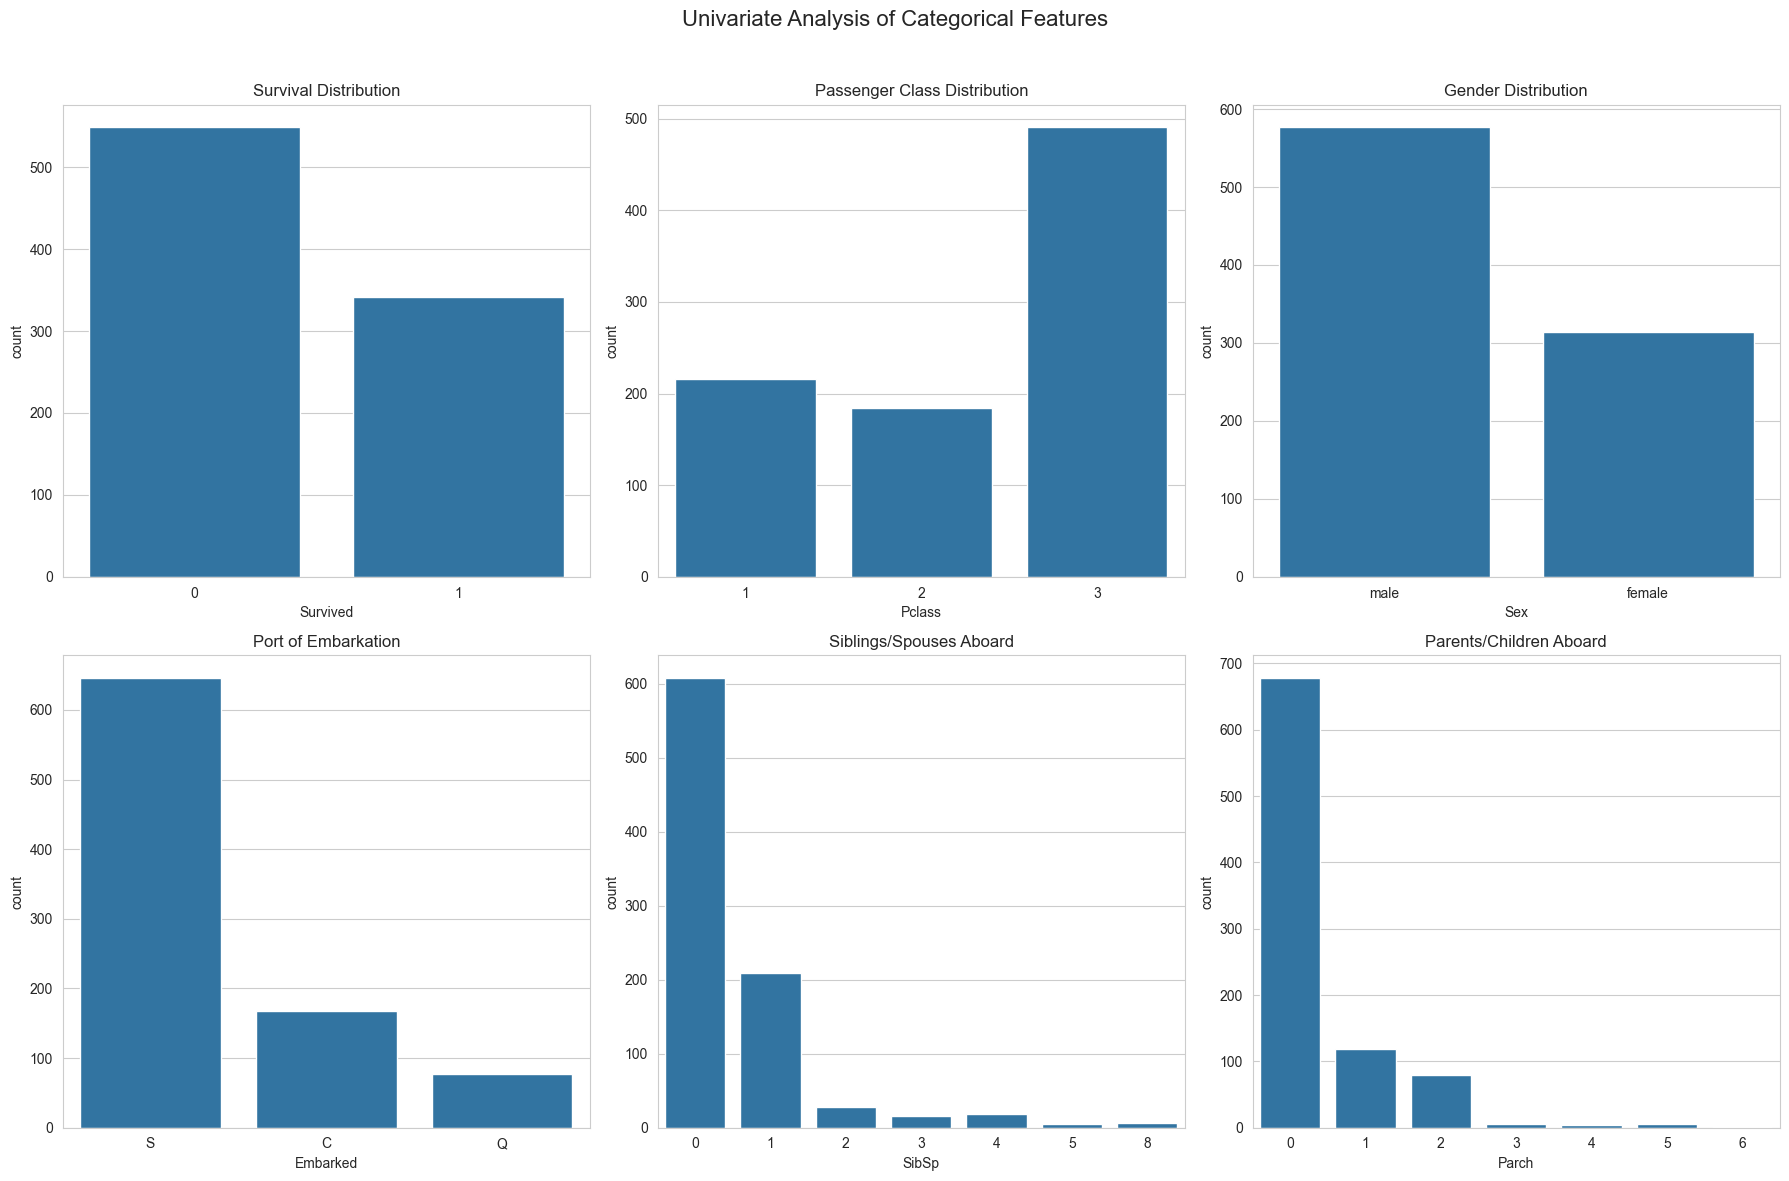

In [29]:
print("Analyzing categorical features:")

# Setting up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.


Analyzing numerical features:


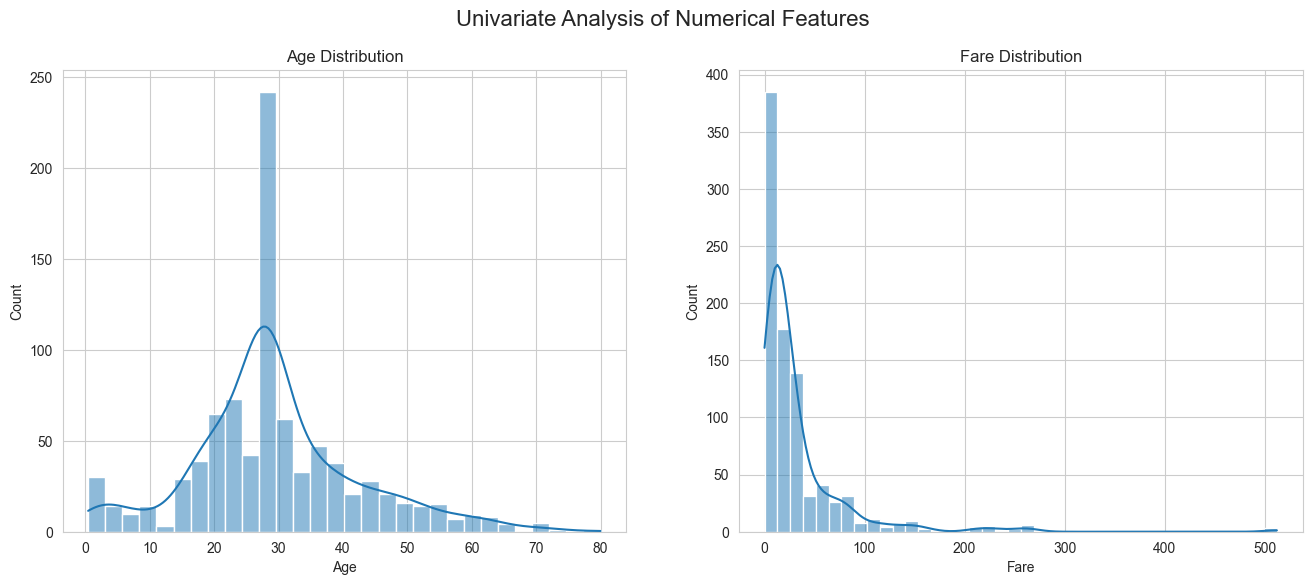

In [30]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=titanic_df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

# Bivariate Analysis

Explorling the relationship between two variables. The primary focus will be on how each feature relates to our target variable, `Survived`.


This type of analysis involves two different variables, and its main purpose is to find relationships between them.
- **Categorical vs. Numerical:** To compare a numerical variable across different categories, we often use bar plots (`barplot`) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.
- **Categorical vs. Categorical:** We can use stacked bar charts or contingency tables (crosstabs).
- **Numerical vs. Numerical:** A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.

Bivariate Analysis: Feature vs. Survival


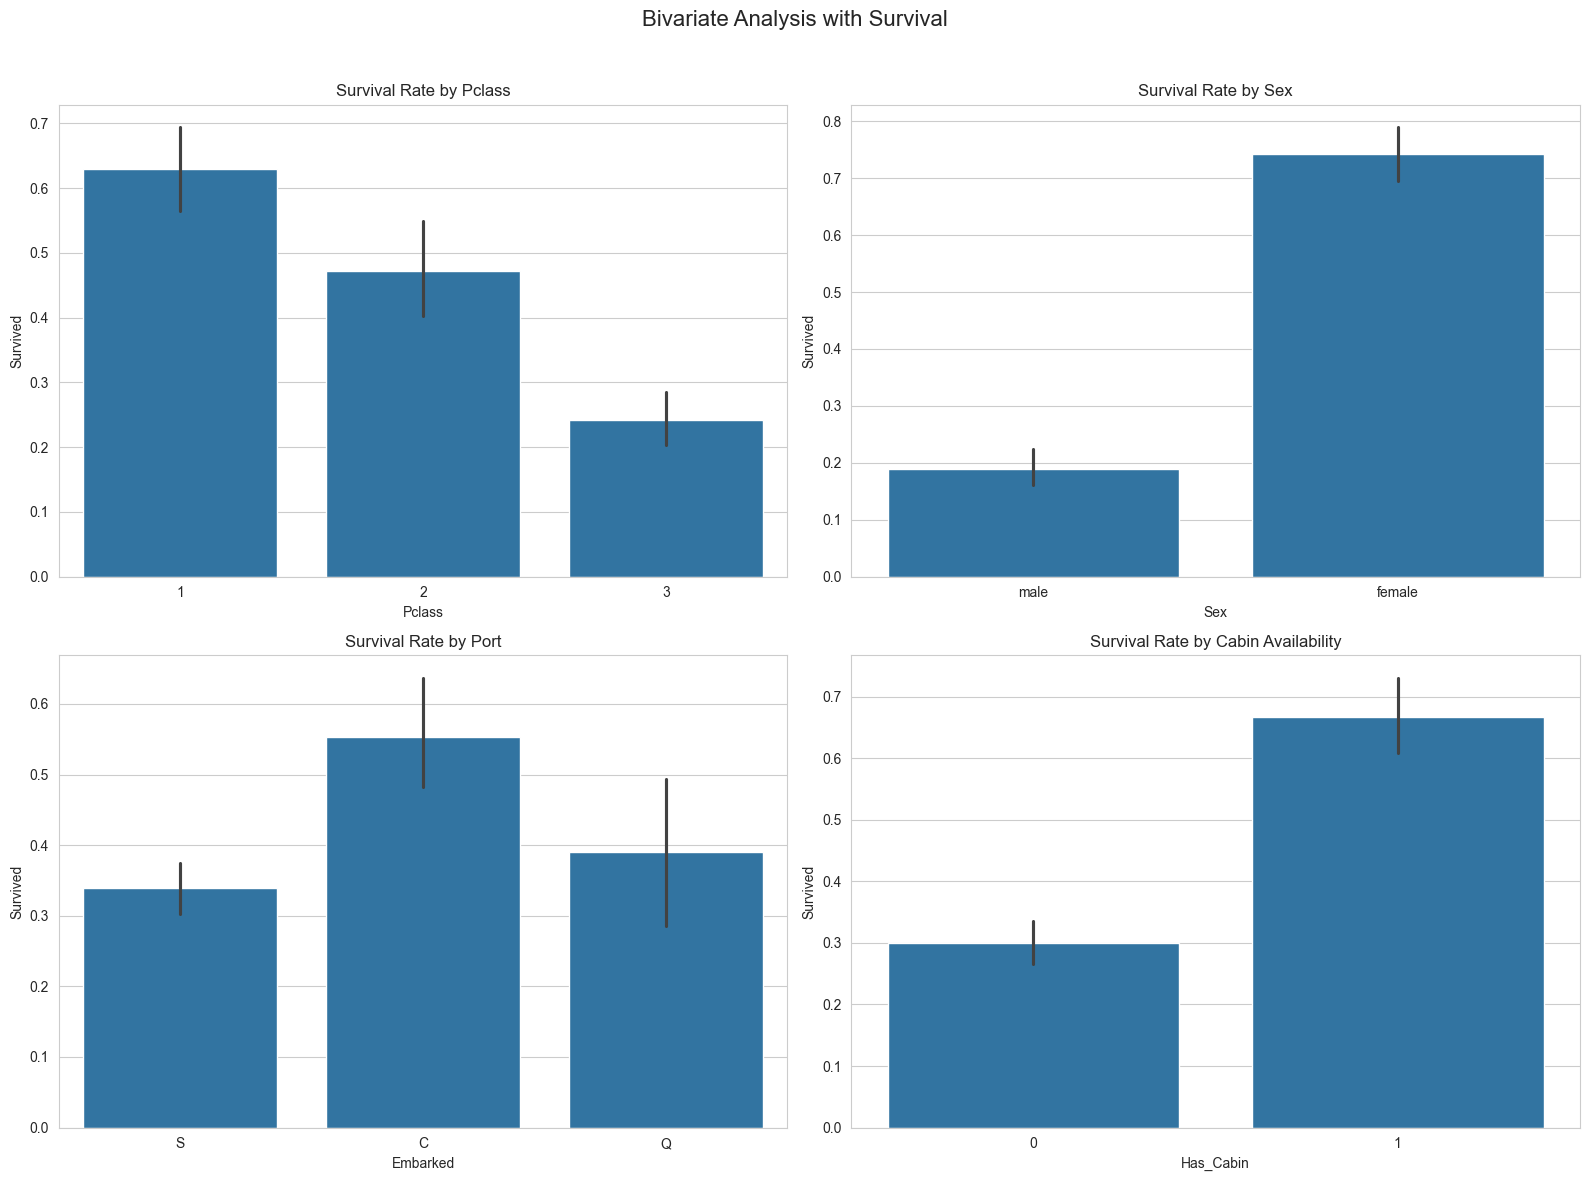

In [31]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

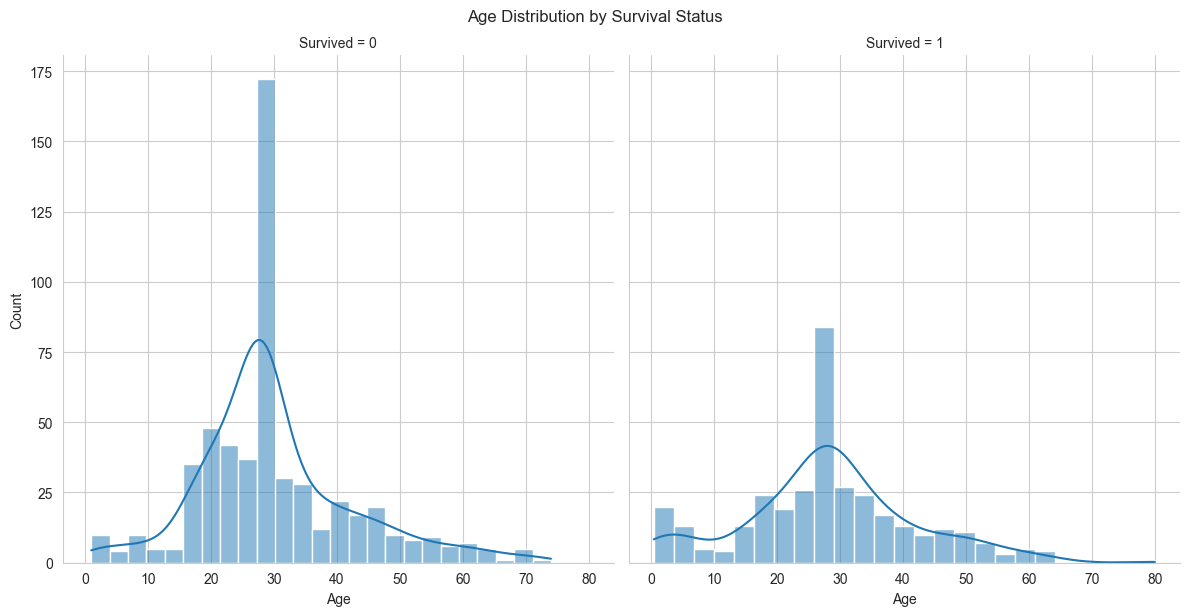

In [32]:
# Age vs. Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

## Outlier Analysis for 'Fare'

Using box plot 

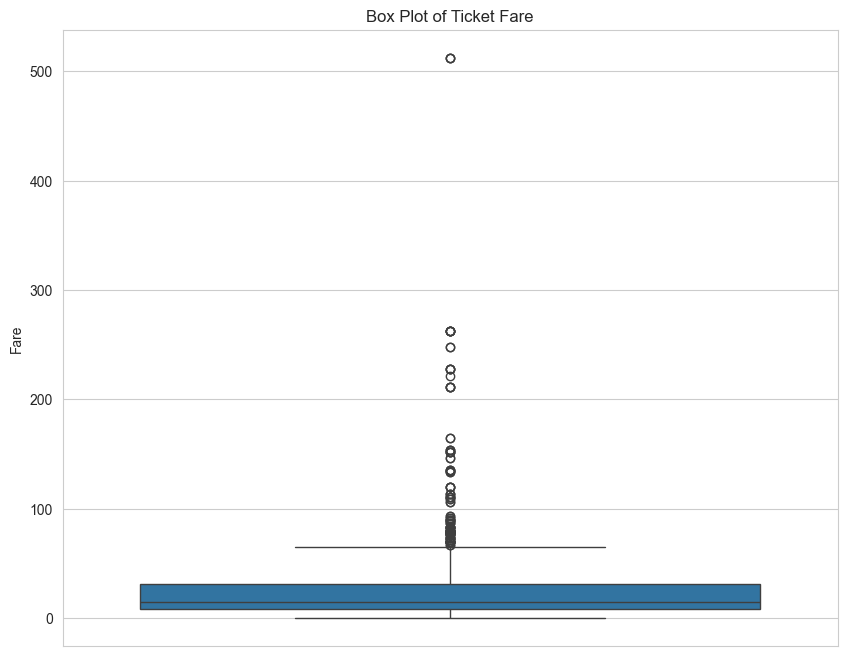

In [33]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

## Feature Engineering

1.  **Combining Features:** Creating a new feature by combining others (e.g., `SibSp` + `Parch` = `FamilySize`).
2.  **Extracting from Text:** Pulling out specific information from a text feature (e.g., extracting titles from the `Name` column).
3.  **Binning:** Converting a continuous numerical feature into a categorical one (e.g., binning `Age` into groups like 'Child', 'Adult', 'Senior').

In [34]:
# 1. Creating a 'FamilySize' feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the person themselves

# 2. Creating an 'IsAlone' feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


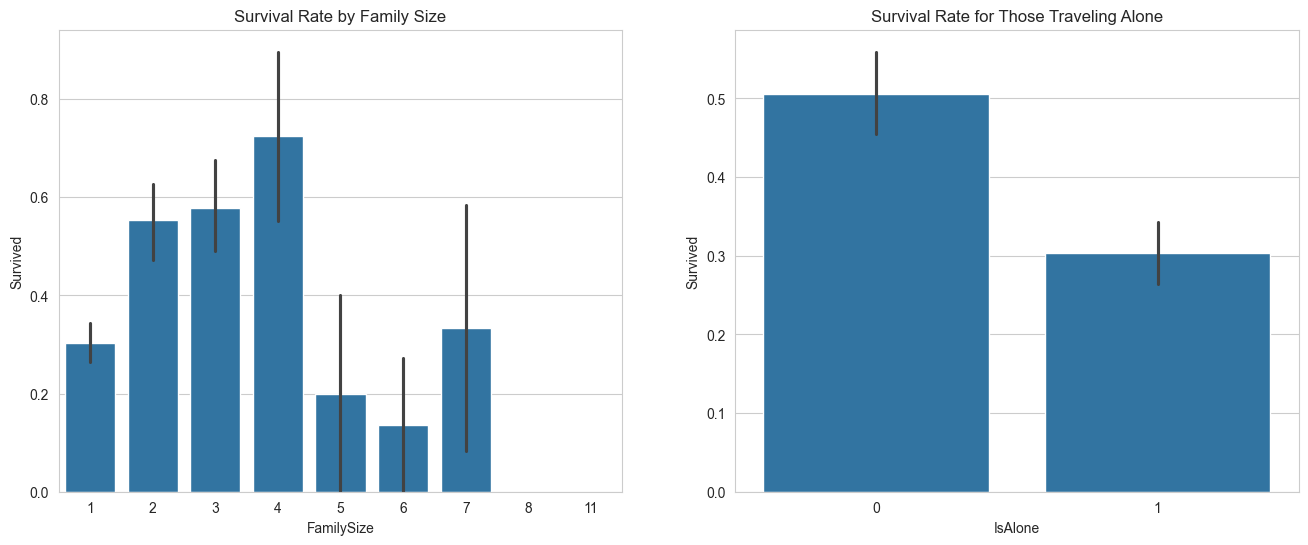

In [35]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

* Matches a space.
* Titles in the names are usually preceded by a space.
([A-Za-z]+): This is the capturing group.
* [A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
* \.: Matches a literal dot (.) which usually follows the title.

In [36]:
# 3. Extract 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

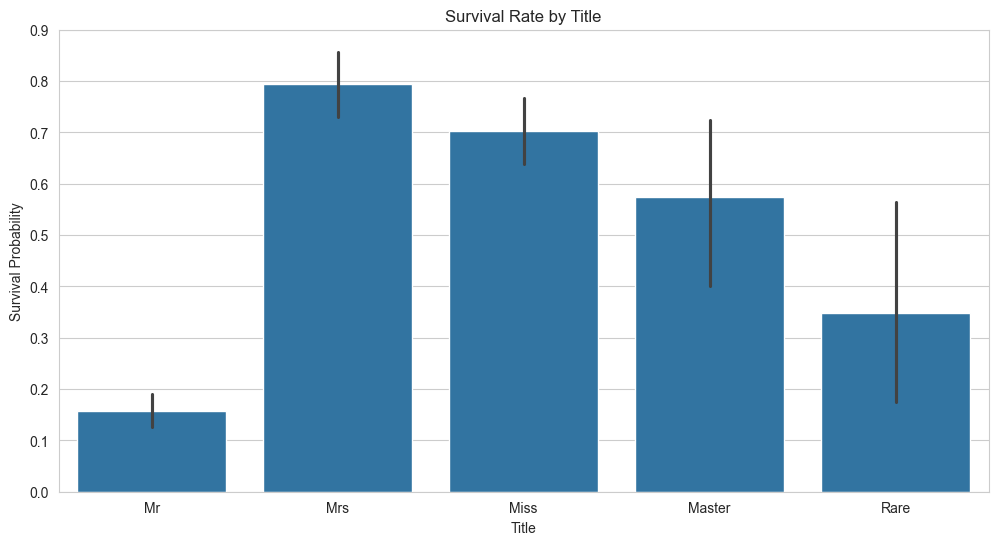

In [37]:
# Simplify the titles by grouping rare ones into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

## Multivariate Analysis

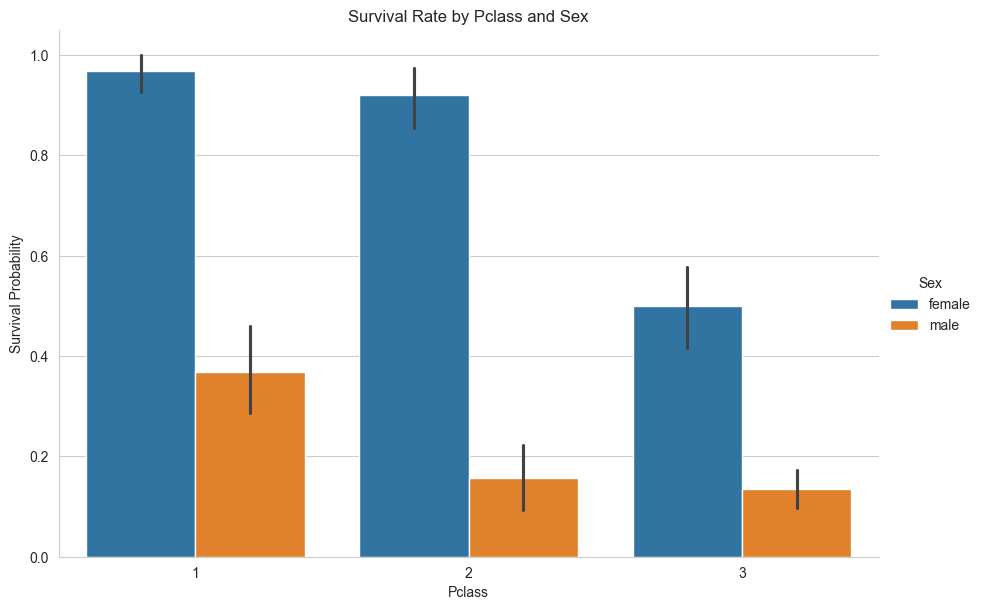

In [ ]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Females in all classes had a significantly higher survival rate than males.

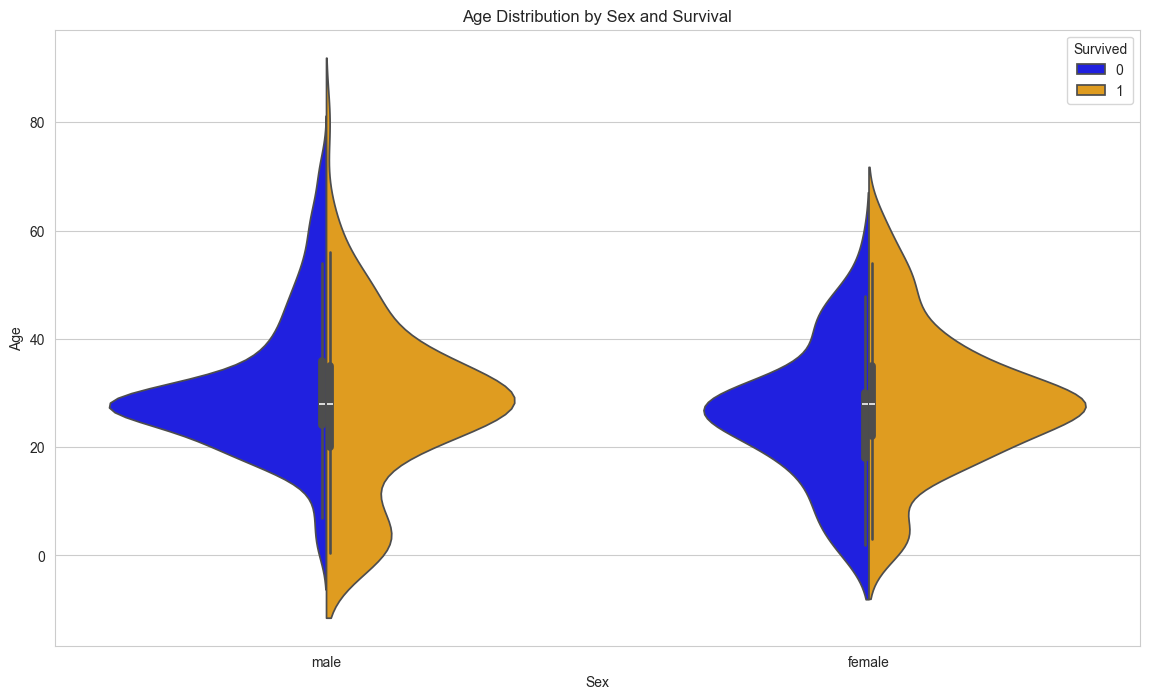

In [39]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

## Correlation Analysis

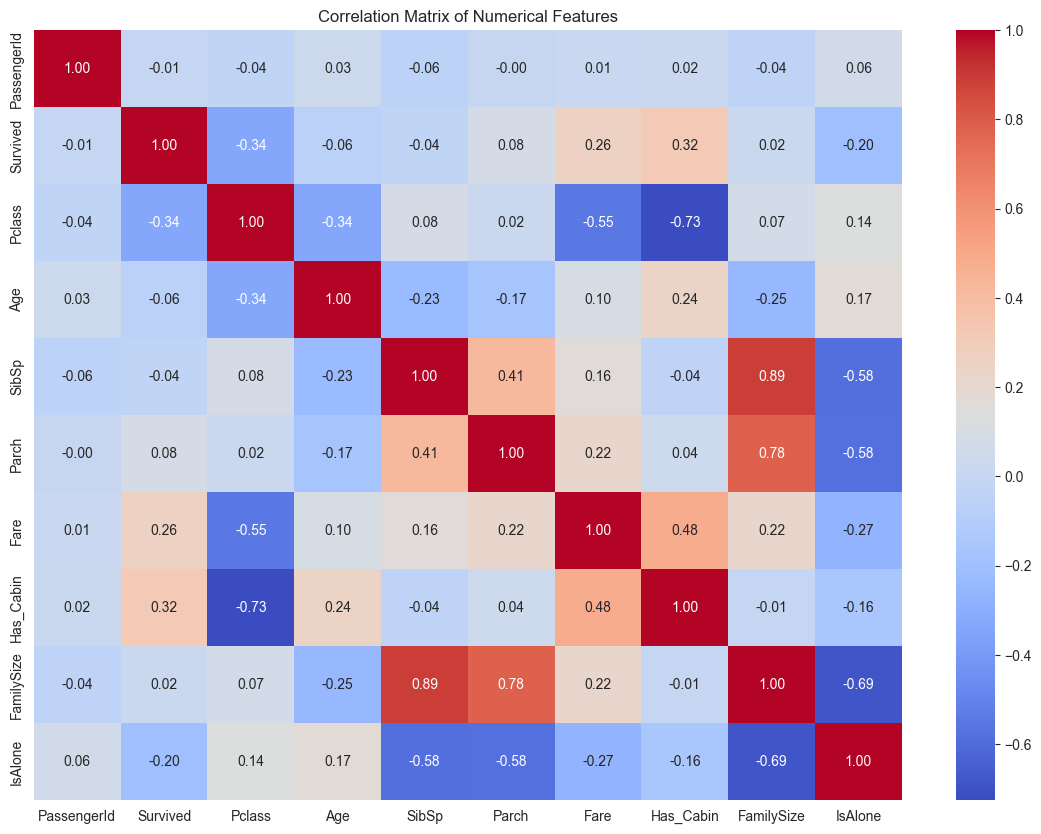

In [40]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

In [ ]:
# Create a sample DataFrame

In [ ]:
# Install ydata-profiling

Submit the html file